   CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM      RPT_DT  \
0   736216184   2016-09-30     23:25:00   09/30/2016     23:25:00  09/30/2016   
1   294332956   2016-09-30     23:16:00   09/30/2016     23:21:00  09/30/2016   
2   852981427   2016-09-30     23:00:00   09/30/2016     23:05:00  09/30/2016   
3   369976063   2016-09-30     23:00:00          NaN          NaN  09/30/2016   
4   117213771   2016-09-30     23:00:00   09/30/2016     23:10:00  09/30/2016   

   KY_CD                     OFNS_DESC  PD_CD                      PD_DESC  \
0    236             DANGEROUS WEAPONS  782.0     WEAPONS, POSSESSION, ETC   
1    344  ASSAULT 3 & RELATED OFFENSES  101.0                    ASSAULT 3   
2    235               DANGEROUS DRUGS  567.0  MARIJUANA, POSSESSION 4 & 5   
3    118             DANGEROUS WEAPONS  793.0         WEAPONS POSSESSION 3   
4    578                 HARRASSMENT 2  637.0   HARASSMENT,SUBD 1,CIVILIAN   

   ... ADDR_PCT_CD LOC_OF_OCCUR_DESC        

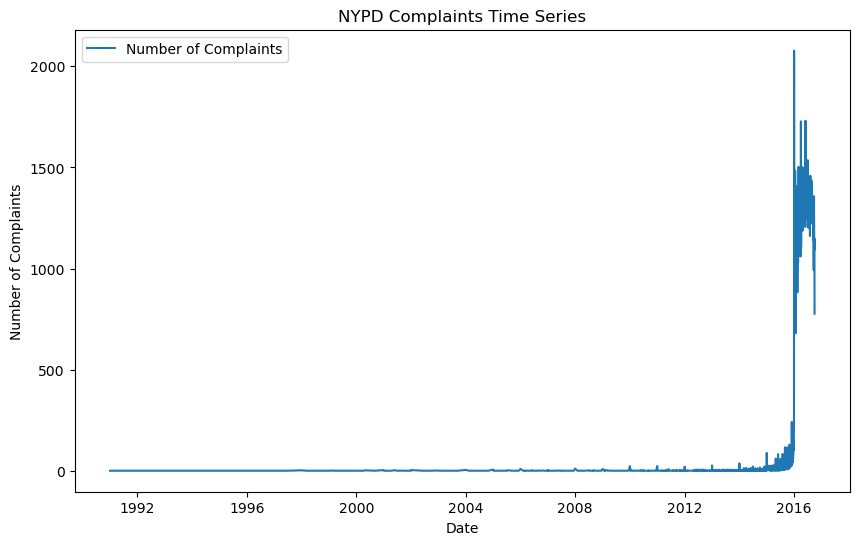

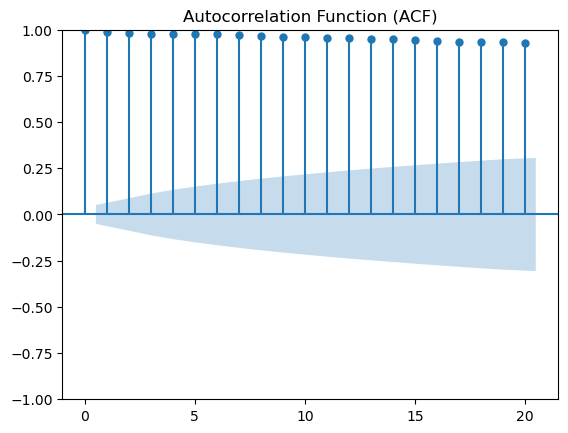

/home/rog-suvab/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


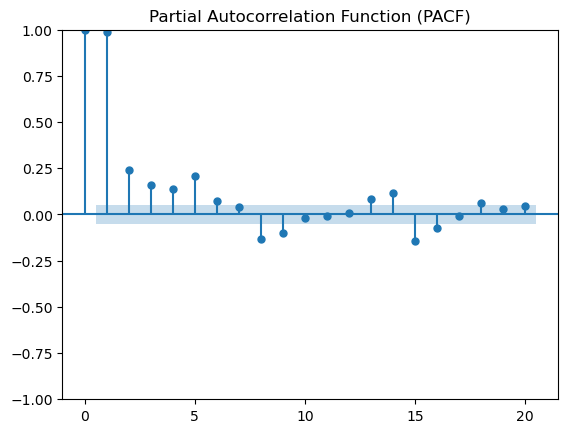

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('../data/NYPD_Complaint_Data_Current_YTD.csv')

# Convert 'CMPLNT_FR_DT' column to datetime format
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')

# Filter data between 2000 and 2024
filtered_df = df[(df['CMPLNT_FR_DT'].dt.year >= 1990) & (df['CMPLNT_FR_DT'].dt.year <= 2024)]

# Print the filtered DataFrame
print(filtered_df.head())
df =  filtered_df

invalid_dates = df['CMPLNT_FR_DT'][pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce').isna()]
print("Invalid Dates:")
print(invalid_dates)

# Remove rows with invalid dates (if needed)
df = df[~pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce').isna()]

# Convert the 'CMPLNT_FR_DT' column to datetime format
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])

# Aggregate the data by date and count the number of complaints for each date
time_series = df.groupby('CMPLNT_FR_DT').size()

# Print the time series data
print(time_series.head())
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])

# Aggregate the data by date and count the number of complaints for each date
time_series = df.groupby('CMPLNT_FR_DT').size()

plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, label='Number of Complaints')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('NYPD Complaints Time Series')
plt.legend()
plt.show()

# Identify parameters for ARIMA model using ACF and PACF plots
plot_acf(time_series, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(time_series, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [3]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('../data/NYPD_Complaint_Data_Current_YTD.csv')

# Convert 'CMPLNT_FR_DT' column to datetime format
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')

# Filter data between 2000 and 2024
filtered_df = df[(df['CMPLNT_FR_DT'].dt.year >= 2016) & (df['CMPLNT_FR_DT'].dt.year <= 2024)]

# Print the filtered DataFrame
print(filtered_df.head())
df =  filtered_df

   CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM      RPT_DT  \
0   736216184   2016-09-30     23:25:00   09/30/2016     23:25:00  09/30/2016   
1   294332956   2016-09-30     23:16:00   09/30/2016     23:21:00  09/30/2016   
2   852981427   2016-09-30     23:00:00   09/30/2016     23:05:00  09/30/2016   
3   369976063   2016-09-30     23:00:00          NaN          NaN  09/30/2016   
4   117213771   2016-09-30     23:00:00   09/30/2016     23:10:00  09/30/2016   

   KY_CD                     OFNS_DESC  PD_CD                      PD_DESC  \
0    236             DANGEROUS WEAPONS  782.0     WEAPONS, POSSESSION, ETC   
1    344  ASSAULT 3 & RELATED OFFENSES  101.0                    ASSAULT 3   
2    235               DANGEROUS DRUGS  567.0  MARIJUANA, POSSESSION 4 & 5   
3    118             DANGEROUS WEAPONS  793.0         WEAPONS POSSESSION 3   
4    578                 HARRASSMENT 2  637.0   HARASSMENT,SUBD 1,CIVILIAN   

   ... ADDR_PCT_CD LOC_OF_OCCUR_DESC        

In [4]:
invalid_dates = df['CMPLNT_FR_DT'][pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce').isna()]
print("Invalid Dates:")
print(invalid_dates)

# Remove rows with invalid dates (if needed)
df = df[~pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce').isna()]

# Convert the 'CMPLNT_FR_DT' column to datetime format
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])
df = df[df['CMPLNT_FR_DT'] > '2016-01-02']

# Aggregate the data by date and count the number of complaints for each date
time_series = df.groupby('CMPLNT_FR_DT').size()

# Print the time series data
print(time_series.head())
test_data = time_series.iloc[-10:]
time_series = time_series.iloc[:-10]


Invalid Dates:
Series([], Name: CMPLNT_FR_DT, dtype: datetime64[ns])
CMPLNT_FR_DT
2016-01-03    1072
2016-01-04    1086
2016-01-05    1040
2016-01-06    1279
2016-01-07    1218
dtype: int64


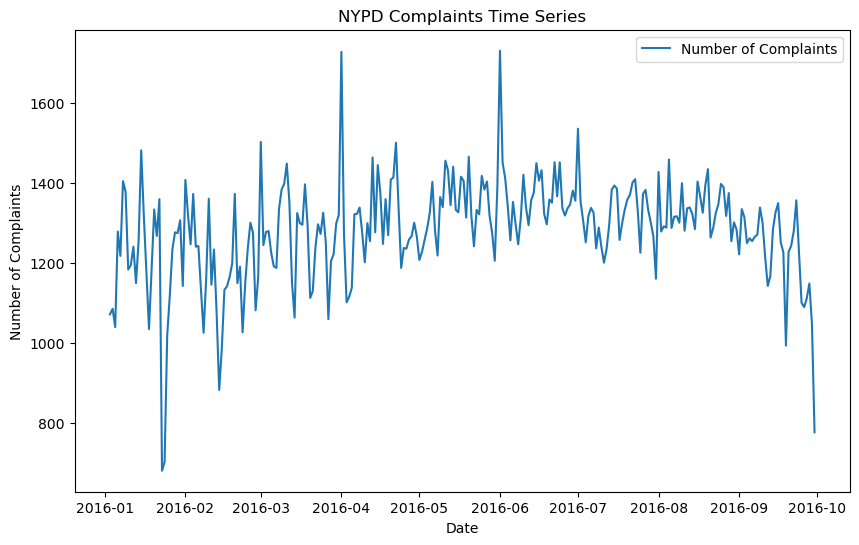

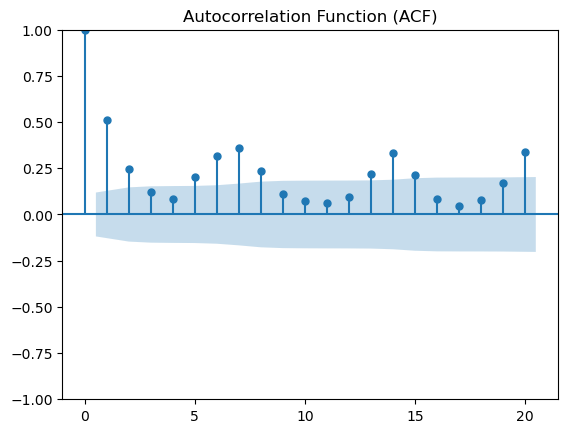

/home/rog-suvab/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


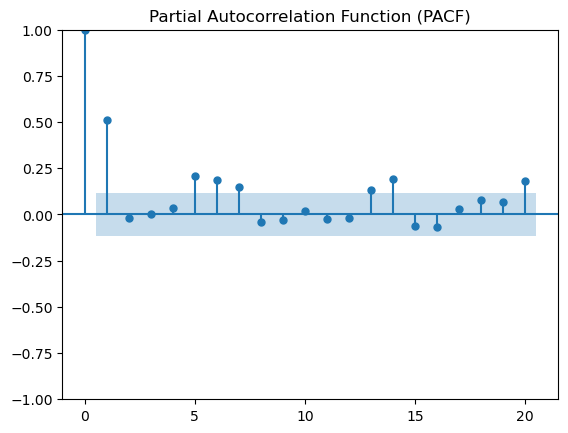

In [5]:
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])

# Aggregate the data by date and count the number of complaints for each date
time_series = df.groupby('CMPLNT_FR_DT').size()

plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, label='Number of Complaints')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('NYPD Complaints Time Series')
plt.legend()
plt.show()

# Identify parameters for ARIMA model using ACF and PACF plots
plot_acf(time_series, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(time_series, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()



/home/rog-suvab/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/rog-suvab/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/rog-suvab/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/rog-suvab/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Short-term Forecast:
2016-10-01    895.100019
2016-10-02    926.358386
2016-10-03    961.445565
2016-10-04    904.822900
2016-10-05    916.248269
2016-10-06    908.175629
2016-10-07    927.393725
2016-10-08    912.558925
2016-10-09    919.955193
2016-10-10    909.839111
Freq: D, Name: predicted_mean, dtype: float64
Short-term Forecast:
2016-10-01    895.100019
2016-10-02    926.358386
2016-10-03    961.445565
2016-10-04    904.822900
2016-10-05    916.248269
2016-10-06    908.175629
2016-10-07    927.393725
2016-10-08    912.558925
2016-10-09    919.955193
2016-10-10    909.839111
Freq: D, Name: predicted_mean, dtype: float64


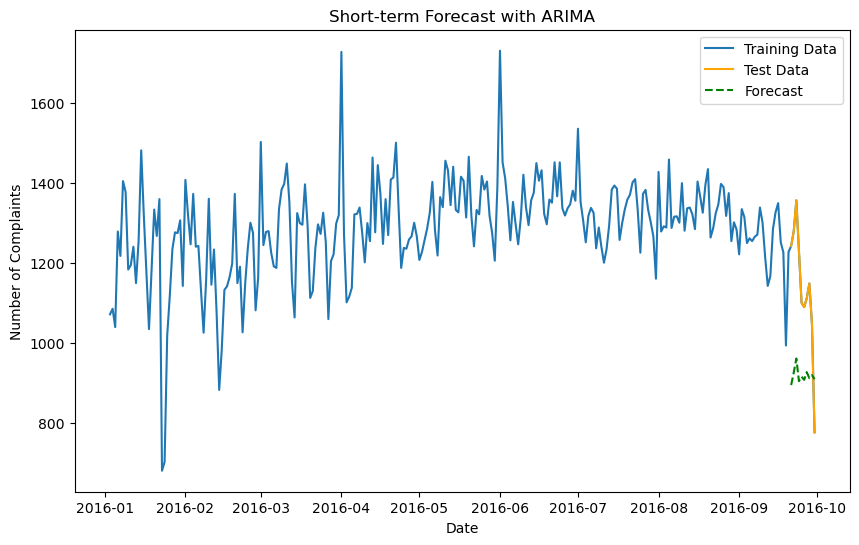

In [6]:

p = 4  # autoregressive order
d = 2  # differences
q = 2  # moving average components


model = ARIMA(time_series, order=(p, d, q))
result = model.fit()

# Make short-term predictions (e.g., forecast 5 time steps ahead)
forecast_steps = 10
forecast = result.forecast(steps=forecast_steps)

print("Short-term Forecast:")
print(forecast)

print("Short-term Forecast:")
print(forecast)

# Plot the original time series, training data, and the forecast on the test data
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, label='Training Data')
plt.plot(test_data.index, test_data.values, label='Test Data', color='orange')
plt.plot(test_data.index, forecast, label='Forecast', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('Short-term Forecast with ARIMA')
plt.legend()
plt.show()

In [7]:
best_aic = float('inf')
best_order = None

for p in range(1, 6):
    for q in range(0, 3):
        for d in range(1, 3):
            try:
                model = ARIMA(time_series, order=(p, d, q))
                result = model.fit()
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, d, q)
            except:
                continue

print("Best ARIMA Order:", best_order)
print("Best AIC:", best_aic)

/home/rog-suvab/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/rog-suvab/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/rog-suvab/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/rog-suvab/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/rog-suvab/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was 

Best ARIMA Order: (5, 1, 2)
Best AIC: 3292.804192028065
